(49.998084163013814, 69.89983760030319, 14.17890251183108, 155.78723634187563)

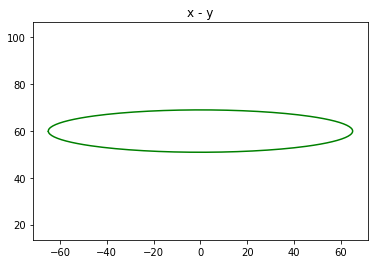

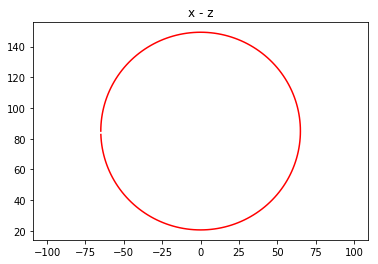

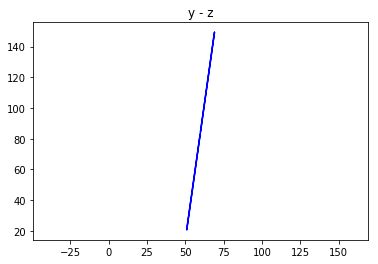

In [36]:
import math
import numpy as np
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt




def tan_deg( tan ):
    tan_in_degree = math.radians(tan)
    return math.tan(tan_in_degree)

def sin_deg( sin ):
    sin_in_degree = math.radians(sin)
    return math.sin(sin_in_degree)

def cos_deg( cos ):
    cos_in_degree = math.radians(cos)
    return math.cos(cos_in_degree)

def vec_add (vec1 , vec2):
    a0 = vec1[0] + vec2[0]
    a1 = vec1[1] + vec2[1]
    a2 = vec1[2] + vec2[2]
    return (a0 , a1 , a2)

def polar_to_cartesian( r , theta):
    y = 0 ;
    x = r * cos_deg(theta)
    z = r * sin_deg(theta)
    return (x , y , z)

def inner(vec1 , vec2): 
    return vec1[0]*vec2[0] + vec1[1]*vec2[1] + vec1[2]*vec2[2]
def vec_abs (vec):
    sq = vec[0]*vec[0] + vec[1]*vec[1] + vec[2]*vec[2]
    return math.sqrt(sq)
def normal (vec): 
    mag = vec_abs(vec)
    return (vec[0]/mag , vec[1]/mag , vec[2]/mag)

resx = np.array([])
resy = np.array([])
resz = np.array([])


    

#A = -80.4493
#B = 5.2082
A = 0 
B = 54.8 

t = 8 
yaw = 0 
#theta = 0
r = 65 
distance_to_nose = 104
#in order to be consistent with tracking code
A = -A 
#############################################
#CALCULATING NOSE VECTORS 

x_nose = distance_to_nose * cos_deg(B) * sin_deg(-A)
y_nose = distance_to_nose * cos_deg(B) * cos_deg(-A)
z_nose = distance_to_nose * sin_deg(B)

#############################################
for theta in range(0,360,2):
    resx = np.append(resx , [x_nose + r * cos_deg(theta)*cos_deg(180+yaw+A) + r * sin_deg(theta)*cos_deg(90-t)*cos_deg(90-A+yaw)])
    resy = np.append(resy , [y_nose + r * cos_deg(theta)*sin_deg(180+yaw+A) + r * sin_deg(theta)*cos_deg(90-t)*sin_deg(90-A+yaw)])
    resz = np.append(resz , [z_nose + r*sin_deg(theta)*sin_deg(90-t)])
    


#ax.plot3D(resx, resy, resz, 'gray')

plt.plot(resx,resy,'green') # x - y
plt.title('x - y')
plt.axis('equal')
plt.figure()
plt.plot(resx,resz , 'red') # x - z
plt.title('x - z')
plt.axis('equal')
plt.figure()
plt.plot(resy,resz , 'blue')# y - z
plt.title('y - z')
plt.axis('equal')

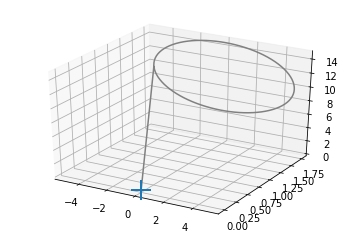

In [35]:
ax = plt.axes(projection='3d')


ax.plot3D(resx, resy, resz, 'gray')

ax.plot3D([0], [0], [0], '+', mew=2, ms=20)

plt.show()